<a href="https://colab.research.google.com/github/SantiagoVillarreal01/aprendizaje-automatico-252601/blob/main/2_2_IdentificarMissingValuesOutliersVillarrealSantiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [6]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = df.isnull().mean() * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame(df[df.isnull().any(axis=1)])  # ← COMPLETAR
    missing_info =  missing_info[df.columns[df.isnull().any()]] # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [7]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,estado,Area Construcción,Terreno,Total M²,estadoTran,tipoTran
0,Usada,93.0,93,93.0,NaN,De Venta
1,Usada,NaN,NaN,88.0,NaN,De Venta
2,Usada,NaN,46,46.0,NaN,De Venta
3,Usada,432.0,405,432.0,NaN,De Venta
4,Usada,71.0,71,71.0,NaN,De Venta
...,...,...,...,...,...,...
4550,NaN,NaN,"154,734",154734.0,NaN,De Venta
4551,NaN,NaN,NaN,918.0,NaN,De Venta
4552,NaN,NaN,"2,125",2125.0,NaN,De Venta
4553,NaN,NaN,"2,500",2500.0,NaN,De Venta


In [10]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    correlation_matrix = df.isnull().corr()
    plt.figure(figsize =(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Mapa de correlacion de valores Faltantes")#← COMPLETAR
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


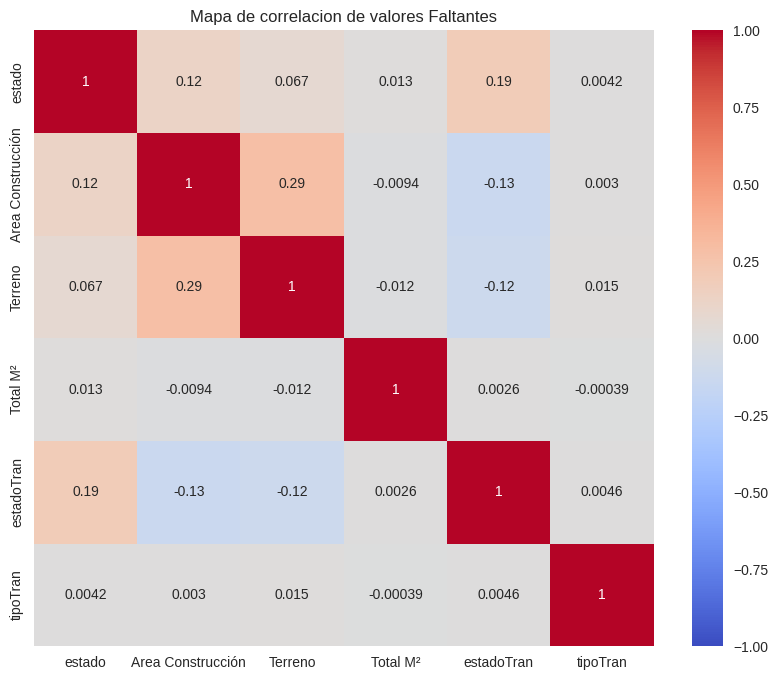

In [11]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [15]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    df_numeric = df.select_dtypes(include=np.number)
    correlation_matrix = df_numeric.corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True)# ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



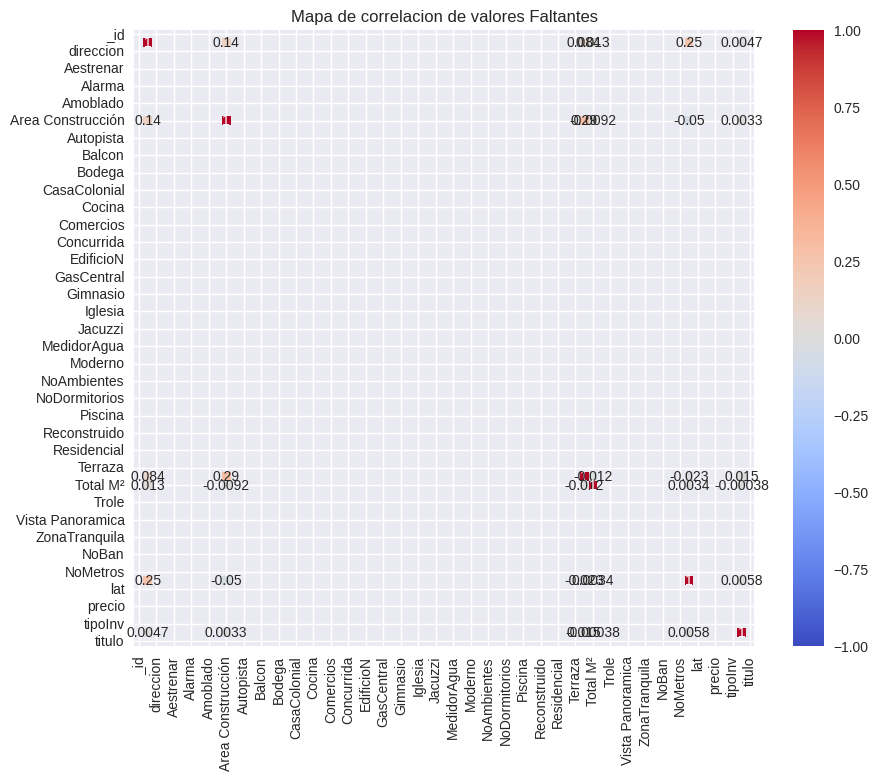

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

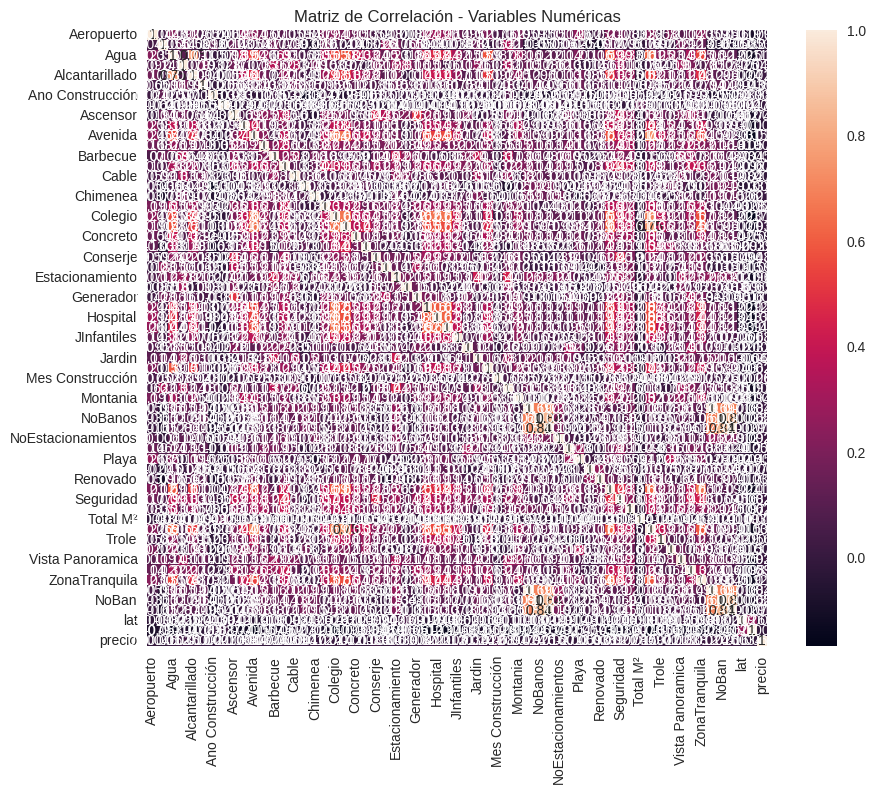

In [16]:
dfValoresFaltantes = analisis_valores_faltantes(df)
grafico_distribucion_faltantes(df) # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

¿Qué variables podrían predecir la presencia de valores faltantes?

In [17]:
#Resultados
print("La area de contruccion y el terreno tienen una correlacion de 0.29 por lo que ambos serian de tipo MAR")
print("Total M2 casi no tiene correlacion con las demas varibles por lo que seria MCAR")
print("El estado y estadoTran tiene una correlacion de 0.19 por lo que ambos serian de tipo MAR")
print("TipoTran no tiene una relacion significativa con las otras variables por lo que seria de tipo MCAR")


La area de contruccion y el terreno tienen una correlacion de 0.29 por lo que ambos serian de tipo MAR
Total M2 casi no tiene correlacion con las demas varibles por lo que seria MCAR
El estado y estadoTran tiene una correlacion de 0.19 por lo que ambos serian de tipo MAR
TipoTran no tiene una relacion significativa con las otras variables por lo que seria de tipo MCAR


# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [20]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
import pandas as pd
import numpy as np

#Transformar valores a tipo numerico
cols_numericas = ['Area Construcción', 'Terreno', 'Total M²']

for col in cols_numericas:
    df[col] = (df[col]
               .astype(str)
               .str.replace(',', '', regex=False)
               .str.replace(' ', '', regex=False))

    # Convertir a tipo numérico
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirmar conversión
print(df[cols_numericas].dtypes)

# Imputación de valores numéricos
df['Area Construcción'] = df['Area Construcción'].fillna(df['Area Construcción'].median())
df['Terreno'] = df['Terreno'].fillna(df['Terreno'].median())
df['Total M²'] = df['Total M²'].fillna(df['Total M²'].median())

# Imputación de valores categóricos
df['estado'] = df['estado'].fillna(df['estado'].mode()[0])
df['estadoTran'] = df['estadoTran'].fillna(df['estadoTran'].mode()[0])
df['tipoTran'] = df['tipoTran'].fillna(df['tipoTran'].mode()[0])

# Verificación final
print("Imputación completada. Valores faltantes restantes:")
print(df.isnull().sum())


Area Construcción    float64
Terreno              float64
Total M²             float64
dtype: object
Imputación completada. Valores faltantes restantes:
_id           0
estado        0
direccion     0
Aeropuerto    0
Aestrenar     0
             ..
precio        0
price         0
tipoInv       0
tipoTran      0
titulo        0
Length: 71, dtype: int64


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [22]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
import scipy.stats as stats
# Selecciona las variables categóricas
var1 = 'estado'
var2 = 'tipoTran'

# Crear tabla de contingencia
tabla = pd.crosstab(df[var1], df[var2])

# Aplicar prueba Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla)

print("Tabla de contingencia:")
print(tabla)
print("\nResultados del test Chi-cuadrado:")
print(f"Chi² = {chi2:.4f}")
print(f"Grados de libertad = {dof}")
print(f"p-valor = {p:.4f}")

# Interpretación
if p < 0.05:
    print("\nExiste una relación estadísticamente significativa entre las variables.")
else:
    print("\nNo se encontró una relación significativa entre las variables.")

Tabla de contingencia:
tipoTran                     De Venta
estado                               
En Construcción / En Planos        78
PROBABLE                            4
Por Estrenar                      491
RESERVADA                          33
Reconstruida/ Renovada            136
Usada                            3749
VENDIDA                            64

Resultados del test Chi-cuadrado:
Chi² = 0.0000
Grados de libertad = 0
p-valor = 1.0000

No se encontró una relación significativa entre las variables.


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [23]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
columnas_categoricas = ['estado', 'estadoTran', 'tipoTran']

for col in columnas_categoricas:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)
    print(f"✅ Columna '{col}' imputada con su moda: {moda}")

print("\nValores faltantes restantes en variables categóricas:")
print(df[columnas_categoricas].isnull().sum())

✅ Columna 'estado' imputada con su moda: Usada
✅ Columna 'estadoTran' imputada con su moda: VENDIDA
✅ Columna 'tipoTran' imputada con su moda: De Venta

Valores faltantes restantes en variables categóricas:
estado        0
estadoTran    0
tipoTran      0
dtype: int64


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

¿En qué casos consideraron que la eliminación era mejor que la imputación?

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

In [24]:
print("Las columnas area construccion, terrono y total M2 dieron problemas en la imputacion ya que habia que transformarlos a variables numericas")
print("En las varibles con mayor numero de valores faltantes")
print("Tipo de valor faltante nos idica la relacion que tienen ciertas columnas, en el caso de que decidamos eliminar una columna no aleatoria nos estariamos arriesgando a perder patrones importantes entre los datos que pueden ser utiles para el aprendizaje")

Las columnas area construccion, terrono y total M2 dieron problemas en la imputacion ya que habia que transformarlos a variables numericas
En las varibles con mayor numero de valores faltantes
Tipo de valor faltante nos idica la relacion que tienen ciertas columnas, en el caso de que decidamos eliminar una columna no aleatoria nos estariamos arriesgando a perder patrones importantes entre los datos que pueden ser utiles para el aprendizaje


# 🚀 ¡TALLER FINALIZADO!"